In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

In [3]:
HIST_DR = pd.read_csv(r"C:\Users\seyi\Downloads\datasets_1340_2416_SPY Index.csv")

In [5]:
HIST_DR.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/29/1993,43.9687,43.9687,43.7500,43.9375,43.9375,1003200
1,2/1/1993,43.9687,44.2500,43.9687,44.2500,44.2500,480500
2,2/2/1993,44.2187,44.3750,44.1250,44.3437,44.3437,201300
3,2/3/1993,44.4062,44.8437,44.3750,44.8125,44.8125,529400
4,2/4/1993,44.9687,45.0937,44.4687,45.0000,45.0000,531500


In [6]:
print(HIST_DR.index)

RangeIndex(start=0, stop=6126, step=1)


In [7]:
print(HIST_DR.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [8]:
ts = HIST_DR['Close'][-10:]

In [9]:
type(ts)

pandas.core.series.Series

In [11]:
HIST_DR['Date'] = pd.to_datetime(HIST_DR['Date'])

In [13]:
HIST_DR.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.9687,43.9687,43.7500,43.9375,43.9375,1003200
1,1993-02-01,43.9687,44.2500,43.9687,44.2500,44.2500,480500
2,1993-02-02,44.2187,44.3750,44.1250,44.3437,44.3437,201300
3,1993-02-03,44.4062,44.8437,44.3750,44.8125,44.8125,529400
4,1993-02-04,44.9687,45.0937,44.4687,45.0000,45.0000,531500


In [14]:
HIST_DR.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [20]:
HIST_DR.iloc[-90:].describe().astype(float)

,Open,High,Low,Close,Adj Close,Volume
count,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01
mean,235.060555,235.724334,234.331333,235.134889,235.134889,7.704989e+07
std,4.059227,3.995295,4.045974,3.988069,3.988069,2.279776e+07
min,226.399994,226.800003,225.270004,225.910004,225.910004,4.692770e+07
25%,233.315002,234.510005,232.900005,233.707497,233.707497,6.023068e+07
50%,235.764999,236.614998,235.000000,235.780006,235.780006,7.343540e+07
75%,238.334999,238.944996,237.722496,238.377495,238.377495,8.728732e+07
max,241.199997,242.080002,240.960007,241.759995,241.759995,1.721741e+08


In [23]:
sample = HIST_DR.sample(20)

In [24]:
print(sample)

           Date        Open        High         Low       Close   Adj Close  \
120  1993-07-22   44.750000   44.812500   44.500000   44.500000   44.500000   
2403 2002-08-13   90.150002   91.660004   88.650002   88.970001   88.970001   
4899 2012-07-11  134.210007  134.600006  133.380005  134.160004  134.160004   
1288 1998-03-06  104.562500  105.937500  104.437500  105.937500  105.937500   
3260 2006-01-06  128.020004  128.580002  127.360001  128.440002  128.440002   
319  1994-05-05   45.296799   45.375000   45.187500   45.187500   45.187500   
2686 2003-09-26  100.440002  100.660004   99.849998   99.949997   99.949997   
1689 1999-10-07  132.859299  133.000000  131.500000  131.875000  131.875000   
2846 2004-05-17  108.889999  109.500000  108.410004  109.099998  109.099998   
2001 2001-01-02  132.000000  132.156204  127.562500  128.812500  128.812500   
3119 2005-06-16  121.059998  121.639999  120.919998  121.400002  121.400002   
1158 1997-08-28   91.187500   91.937500   90.000000 

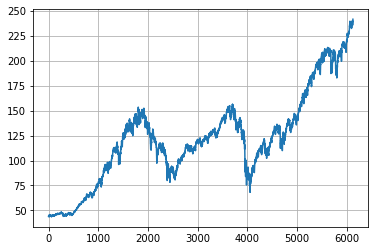

In [25]:
HIST_DR['Close'].plot(grid=True)
plt.show()

In [28]:
# Assign `Adj Close` to `daily_close`
daily_close = HIST_DR[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

      Adj Close
0      0.000000
1      0.007112
2      0.002118
3      0.010572
4      0.004184
...         ...
6121   0.006504
6122   0.005077
6123   0.002213
6124   0.002333
6125   0.004779

[6126 rows x 1 columns]
      Adj Close
0           NaN
1      0.007087
2      0.002115
3      0.010516
4      0.004175
...         ...
6121   0.006483
6122   0.005065
6123   0.002210
6124   0.002330
6125   0.004768

[6126 rows x 1 columns]


In [30]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

      Adj Close
0           NaN
1      0.007112
2      0.002118
3      0.010572
4      0.004184
...         ...
6121   0.006504
6122   0.005077
6123   0.002213
6124   0.002333
6125   0.004779

[6126 rows x 1 columns]


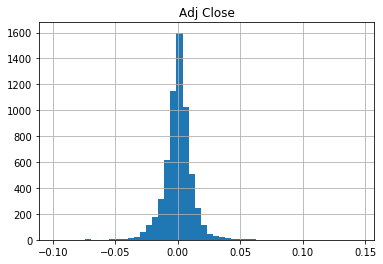

         Adj Close
count  6125.000000
mean      0.000347
std       0.011710
min      -0.098448
25%      -0.004714
50%       0.000594
75%       0.005791
max       0.145198


In [31]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [32]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

      Adj Close
0           NaN
1      1.007112
2      1.009245
3      1.019915
4      1.024182
...         ...
6121   5.423841
6122   5.451380
6123   5.463442
6124   5.476188
6125   5.502361

[6126 rows x 1 columns]
